#### Simplified and modified from the PyTorch tutorial available here:

https://pytorch.org/tutorials/intermediate/char_rnn_classification_tutorial.html#creating-the-network

In [81]:
from io import open
import glob
import os

In [82]:
print(glob.glob('datasets/data/names/*.txt'))

['datasets/data/names/Czech.txt', 'datasets/data/names/German.txt', 'datasets/data/names/Arabic.txt', 'datasets/data/names/Japanese.txt', 'datasets/data/names/Chinese.txt', 'datasets/data/names/Vietnamese.txt', 'datasets/data/names/Russian.txt', 'datasets/data/names/French.txt', 'datasets/data/names/Irish.txt', 'datasets/data/names/English.txt', 'datasets/data/names/Spanish.txt', 'datasets/data/names/Greek.txt', 'datasets/data/names/Italian.txt', 'datasets/data/names/Portuguese.txt', 'datasets/data/names/Scottish.txt', 'datasets/data/names/Dutch.txt', 'datasets/data/names/Korean.txt', 'datasets/data/names/Polish.txt']


In [83]:
import unicodedata
import string

all_letters = string.ascii_letters + " .,;'"
n_letters = len(all_letters)

all_letters

"abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ .,;'"

In [84]:
n_letters

57

#### Build the language_names dictionary, a list of names per language

In [85]:
language_names = {}

all_languages = []

#### Read a file and split into lines

Turn a Unicode string to plain ASCII (may alter the meaning of words)
https://stackoverflow.com/questions/517923/what-is-the-best-way-to-remove-accents-in-a-python-unicode-string/518232#518232

In [86]:
def unicodeToAscii(s):
    return ''.join(
        c for c in unicodedata.normalize('NFD', s)
        if unicodedata.category(c) != 'Mn'
        and c in all_letters
    )

In [87]:
print(unicodeToAscii('Émile'))

Emile


In [88]:
def findFiles(path): 
    return glob.glob(path)

In [89]:
total_names = 0

for filename in findFiles('datasets/data/names/*.txt'):
    
    language = os.path.splitext(os.path.basename(filename))[0]
    
    all_languages.append(language)
    
    read_names = open(filename, encoding='utf-8').read().strip().split('\n')
    
    names = [unicodeToAscii(line) for line in read_names]
    
    language_names[language] = names
    
    total_names += len(names)

#### There are 18 languages to which a name can be classified into

In [90]:
all_languages

['Czech',
 'German',
 'Arabic',
 'Japanese',
 'Chinese',
 'Vietnamese',
 'Russian',
 'French',
 'Irish',
 'English',
 'Spanish',
 'Greek',
 'Italian',
 'Portuguese',
 'Scottish',
 'Dutch',
 'Korean',
 'Polish']

In [114]:
n_languages = len(all_languages)
n_languages

18

In [93]:
total_names

20074

Now we have language_names, a dictionary mapping each category (language) to a list of lines (names). 

In [95]:
print(language_names['Czech'][:5])

['Abl', 'Adsit', 'Ajdrna', 'Alt', 'Antonowitsch']


#### Turning Names into Tensors

Represent each name in one-hot encoded form (1 for the position of the letter, 0 elsewhere)

To make a word we join a bunch of those into a 2D matrix <line_length x 1 x n_letters>.
That extra 1 dimension is because PyTorch assumes everything is in batches - we're just using a batch size of 1 here.

In [96]:
import torch

In [97]:
def letterToTensor(letter):
    
    tensor = torch.zeros(1, n_letters)
    tensor[0][all_letters.find(letter)] = 1
    
    return tensor

In [98]:
print(letterToTensor('a'))

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0.]])


In [99]:
print(letterToTensor('Z'))

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
         0., 0., 0.]])


In [100]:
def nameToTensor(name):
    tensor = torch.zeros(len(name), 1, n_letters)
    
    for li, letter in enumerate(name):
        tensor[li][0][all_letters.find(letter)] = 1
    
    return tensor

In [101]:
mary_tensor = nameToTensor('Mary')

mary_tensor.size()

torch.Size([4, 1, 57])

In [102]:
mary_tensor

tensor([[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.]],

        [[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0

In [103]:
import torch.nn as nn

class RNN(nn.Module):
    
    def __init__(self, input_size, hidden_size, output_size):
        
        super(RNN, self).__init__()

        self.hidden_size = hidden_size

        self.i2h = nn.Linear(input_size + hidden_size, hidden_size)
        
        self.i2o = nn.Linear(input_size + hidden_size, output_size)
        
        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, input, hidden):
        combined = torch.cat((input, hidden), 1)
        
        hidden = self.i2h(combined)
        
        output = self.i2o(combined)
        output = self.softmax(output)
        
        return output, hidden

    def initHidden(self):
        return torch.zeros(1, self.hidden_size)

In [104]:
n_hidden = 256

rnn = RNN(n_letters, n_hidden, n_languages)

#### Manually testing the network

In [105]:
inp = letterToTensor('C')

hidden = torch.zeros(1, n_hidden)

output, next_hidden = rnn(inp, hidden)

print('output size =', output.size())
print('next_hidden size =', next_hidden.size())

output size = torch.Size([1, 18])
next_hidden size = torch.Size([1, 256])


we can see the output is a < 1 x n_categories >

In [106]:
inp = nameToTensor('Charron')

hidden = torch.zeros(1, n_hidden)

output, next_hidden = rnn(inp[0], hidden)

In [107]:
print(output)

tensor([[-2.9201, -2.8437, -2.9337, -2.8996, -2.9487, -2.8158, -2.8755, -2.8304,
         -2.8963, -2.8802, -2.9558, -2.9442, -2.9310, -2.8827, -2.8514, -2.8347,
         -2.8924, -2.9064]], grad_fn=<LogSoftmaxBackward>)


In [108]:
print(next_hidden)

tensor([[-0.0460,  0.0001,  0.0199,  0.0120, -0.0108,  0.0264, -0.0025,  0.0840,
          0.0578,  0.0481, -0.0841, -0.0279, -0.0607, -0.0228,  0.0506,  0.0262,
          0.0307,  0.0785,  0.0396,  0.0019,  0.0524,  0.0039, -0.0044, -0.0992,
          0.0384,  0.0863, -0.0095, -0.0299,  0.0898,  0.0107,  0.0447, -0.0552,
         -0.0270, -0.0288, -0.0802,  0.0136,  0.0089,  0.0488, -0.0442, -0.0615,
         -0.0090, -0.0308, -0.0509,  0.0606, -0.1017, -0.0037, -0.0155, -0.0220,
         -0.0805, -0.0056,  0.0604, -0.0678,  0.0770,  0.0403,  0.0572,  0.0000,
          0.0956,  0.0672,  0.0059, -0.0413, -0.0189, -0.0105,  0.0015, -0.1103,
         -0.0397, -0.0075, -0.0595, -0.0448, -0.0556, -0.0476,  0.0318, -0.0724,
         -0.0046, -0.0015, -0.0459,  0.0496,  0.0539,  0.0351, -0.0775, -0.0371,
          0.1074,  0.0910, -0.0803, -0.0086,  0.0618,  0.0257, -0.0180, -0.0290,
         -0.0665,  0.0225, -0.0192,  0.0066, -0.0031,  0.0217,  0.0353, -0.0436,
          0.0716, -0.0304, -

#### Preparing for Training

We  make a few helper functions  the first one is to interpret the output of the network, which we know to be a likelihood of each language. We can use Tensor.topk to get the index of the greatest value

In [109]:
def languageFromOutput(output):
    
    _, top_i = output.topk(1)
    
    language_i = top_i[0].item()
    
    return all_languages[language_i], language_i

In [110]:
print(languageFromOutput(output))

('Vietnamese', 5)


We will also want a quick way to get a training example (a name and its language)

In [117]:
import random

def randomTrainingExample():
    
    random_language_index = random.randint(0, n_languages - 1)
    language = all_languages[random_language_index]
    
    random_language_names = language_names[language]
    
    name = random_language_names[random.randint(0, len(random_language_names) - 1)]
    
    language_tensor = torch.tensor([all_languages.index(language)], dtype=torch.long)
    name_tensor = nameToTensor(name)
    
    return language, name, language_tensor, name_tensor

In [118]:
for i in range(10):
    language, name, language_tensor, name_tensor = randomTrainingExample()
    
    print('language =', language, ', name =', name)

language = German , name = Bohn
language = French , name = Paquet
language = Italian , name = Albani
language = Japanese , name = Shigi
language = Portuguese , name = Moreno
language = Scottish , name = Mackenzie
language = Arabic , name = Shamon
language = Irish , name = Suaird
language = German , name = Reiher
language = English , name = Busby


#### Training the Network

In [119]:
criterion = nn.NLLLoss()
learning_rate = 0.005 

Each loop of training will:

- Create input and target tensors
- Create a zeroed initial hidden state
- Read each letter in and
- Keep hidden state for next letter
- Compare final output to target
- Back-propagate
- Return the output and loss

In [120]:
def train(langauge_tensor, name_tensor):
    
    hidden = rnn.initHidden()

    rnn.zero_grad()

    for i in range(name_tensor.size()[0]):
        output, hidden = rnn(name_tensor[i], hidden)

    loss = criterion(output, langauge_tensor)
    loss.backward()

    for p in rnn.parameters():
        p.data.add_(-learning_rate, p.grad.data)

    return output, loss.item()

Now we just have to run that with a bunch of examples. Since the train function returns both the output and loss we can print its guesses and also keep track of loss for plotting. Since there are 1000s of examples we print only every print_every examples, and take an average of the loss.

In [121]:
n_iters = 200000

current_loss = 0
all_losses = []

- Get a random training input and target
- Print iter number, loss, name and guess
- Add current loss avg to list of losses

In [122]:
for epoch in range(1, n_iters + 1):
    
    language, name, language_tensor, name_tensor = randomTrainingExample()
    
    output, loss = train(language_tensor, name_tensor)
    current_loss += loss

    if epoch % 5000 == 0:
        guess, guess_i = languageFromOutput(output)
        correct = '✓' if guess == language else '✗ (%s)' % language
        
        print('%d %d%% %.4f %s / %s %s' % (epoch, 
                                           epoch / n_iters * 100,
                                           loss,
                                           name, 
                                           guess, 
                                           correct))

    if epoch % 1000 == 0:
        all_losses.append(current_loss / 1000)
        current_loss = 0

5000 2% 2.9732 Klerkx / Spanish ✗ (Dutch)
10000 5% 4.0740 Rao / Chinese ✗ (Italian)
15000 7% 0.8086 Bertsimas / Greek ✓
20000 10% 1.2744 Duong / Vietnamese ✓
25000 12% 0.9755 Vuu / Vietnamese ✓
30000 15% 2.2516 Chou / Korean ✗ (Chinese)
35000 17% 2.4976 Buckholtz / Polish ✗ (German)
40000 20% 2.5506 Segal / Irish ✗ (French)
45000 22% 1.9578 Vaca / Spanish ✗ (Czech)
50000 25% 2.2387 Vogt / French ✗ (German)
55000 27% 1.1187 Romao / Portuguese ✓
60000 30% 2.1793 Michel / Irish ✗ (Polish)
65000 32% 4.4637 Ivor / French ✗ (Irish)
70000 35% 0.6650 Pagano / Italian ✓
75000 37% 0.5543 Kappel / Dutch ✓
80000 40% 0.6744 Baiborodoff / Russian ✓
85000 42% 1.7367 Artz / Spanish ✗ (German)
90000 45% 2.4913 Rios / Portuguese ✗ (Spanish)
95000 47% 1.2147 You / Korean ✗ (Chinese)
100000 50% 0.6506 Thai / Vietnamese ✓
105000 52% 2.4480 Oberst / Dutch ✗ (German)
110000 55% 0.6118 Abasolo / Spanish ✓
115000 57% 0.5204 Gomulka / Polish ✓
120000 60% 0.6427 Cardozo / Portuguese ✓
125000 62% 0.4868 Eoghan / 

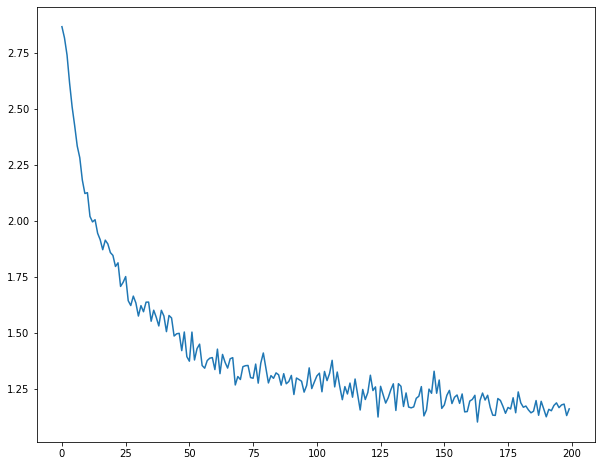

In [123]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.plot(all_losses)
plt.show()

#### Running on User Input

In [124]:
n_predictions = 3

In [125]:
input_name = 'Batsakis' #Re-run for 'Amaya' and 'Bukoski'

In [126]:
with torch.no_grad():
    
    name_tensor = nameToTensor(input_name)
    
    hidden = rnn.initHidden()
    for i in range(name_tensor.size()[0]):
        output, hidden = rnn(name_tensor[i], hidden)

    topv, topi = output.topk(n_predictions, 1, True)

    for i in range(n_predictions):
        
        value = topv[0][i].item()
        language_index = topi[0][i].item()
        
        print('(%.2f) %s' % (value, all_languages[language_index]))

(-0.17) Greek
(-2.43) Russian
(-3.92) Dutch
